In [ ]:
import pandas as pd
import numpy as np
!pip install prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
air_passenger_data = pd.read_csv(r'/content/AirPassengers.csv')
air_passenger_data = air_passenger_data.rename(columns={'Month': 'ds', '#Passengers': 'y'})


In [ ]:
air_passenger_data['ds'] = pd.to_datetime(air_passenger_data['ds'])

In [ ]:
model = Prophet()
model.fit(air_passenger_data)


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/94bb5zf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/ucmwtua6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70770', 'data', 'file=/tmp/tmpbkafy4av/94bb5zf8.json', 'init=/tmp/tmpbkafy4av/ucmwtua6.json', 'output', 'file=/tmp/tmpbkafy4av/prophet_modelsdw0l82s/prophet_model-20240719001012.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:10:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:10:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


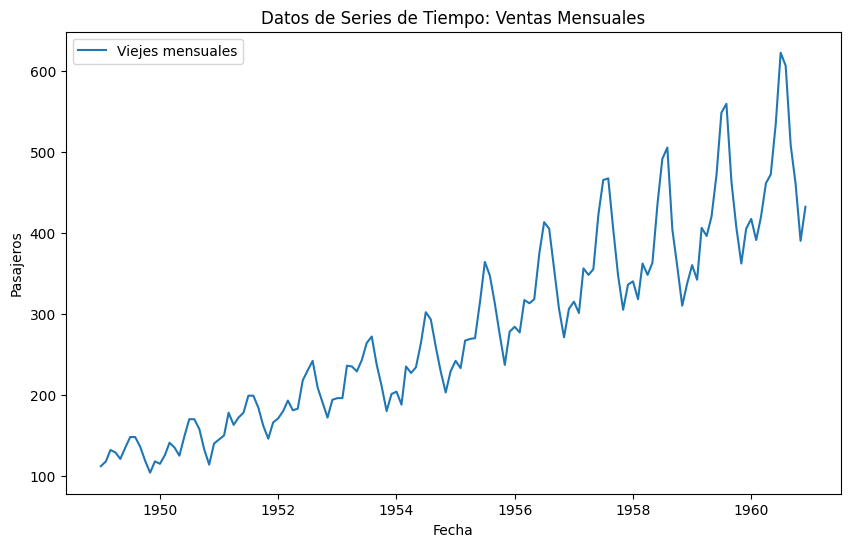

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

# Plotear los datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Viejes mensuales')
plt.title('Datos de Series de Tiempo: Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

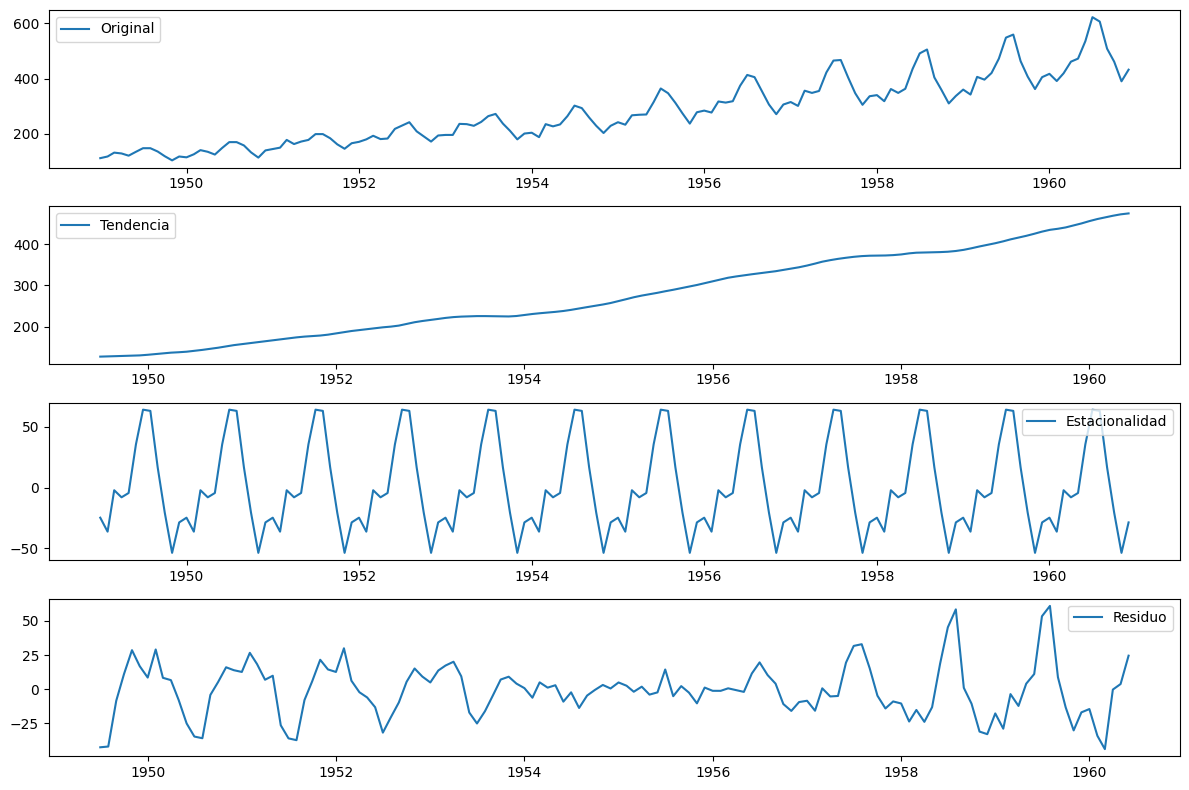

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

decomposition = seasonal_decompose(series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

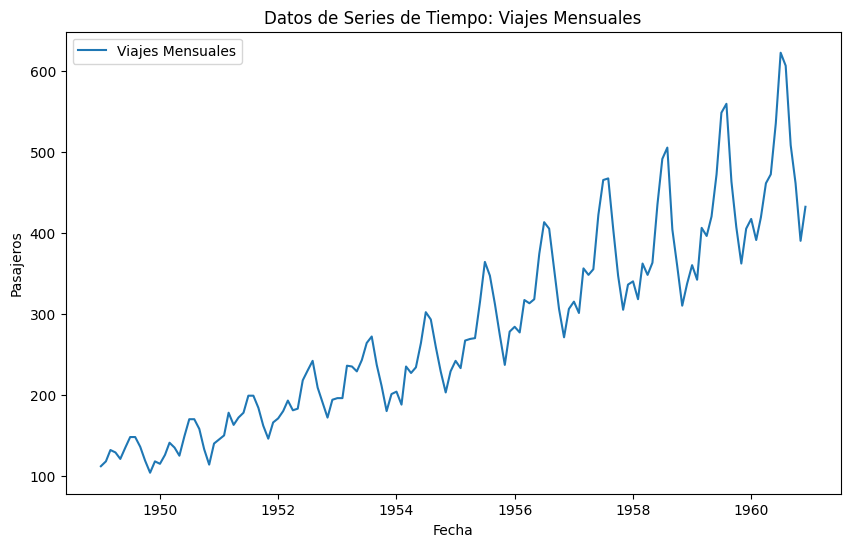

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641


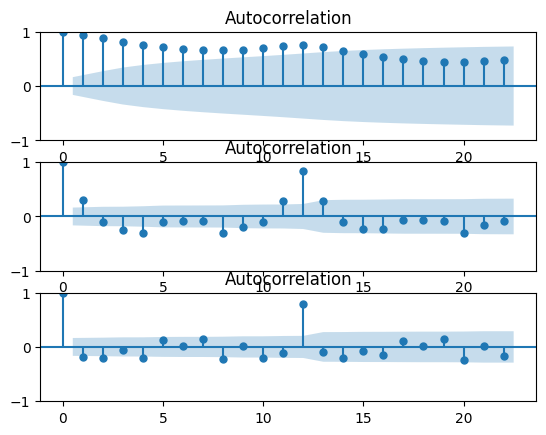

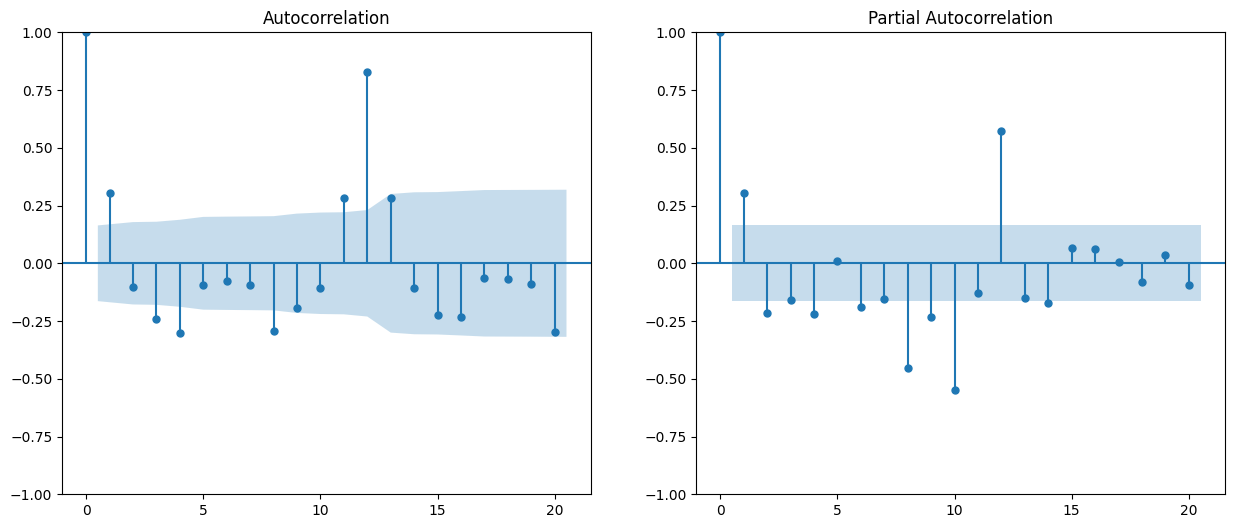

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

plt.figure(figsize=(10, 6))
plt.plot(series, label='Viajes Mensuales')
plt.title('Datos de Series de Tiempo: Viajes Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()


result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


differenced_series = series.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(series, ax=ax1)
plot_acf(series.diff().dropna(), ax=ax2)
plot_acf(series.diff().diff().dropna(), ax=ax3)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sm.graphics.tsa.plot_acf(differenced_series, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, lags=20, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -675.954
Date:                Fri, 19 Jul 2024   AIC                           1371.908
Time:                        00:51:47   BIC                           1401.537
Sample:                    01-01-1949   HQIC                          1383.948
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1350      0.282      0.478      0.633      -0.419       0.689
ar.L2          0.2894      0.199      1.457      0.145      -0.100       0.679
ar.L3         -0.3151      0.170     -1.857      0.0

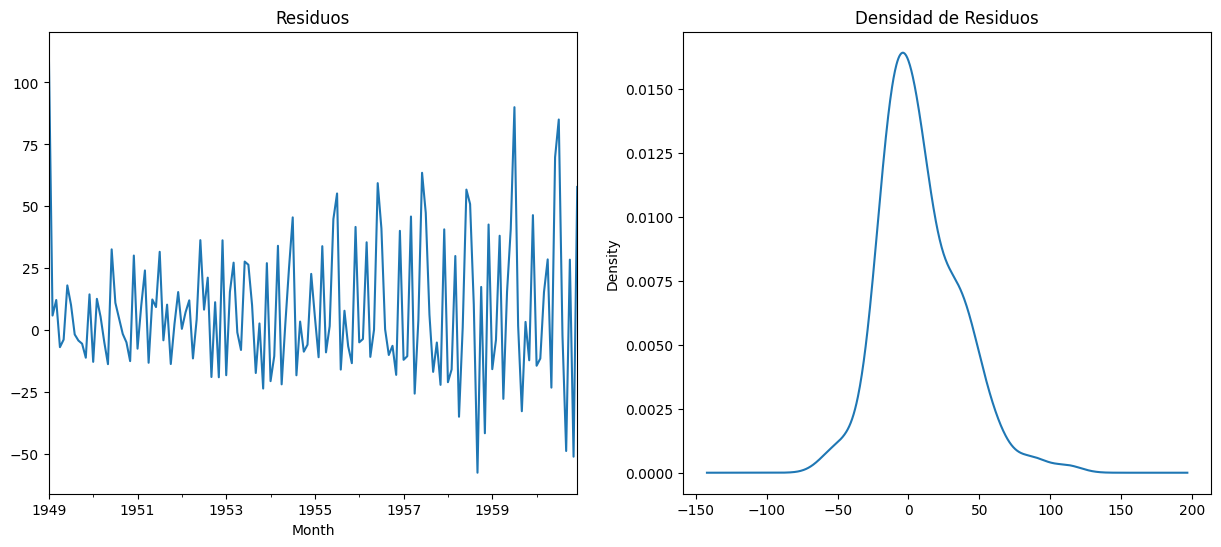

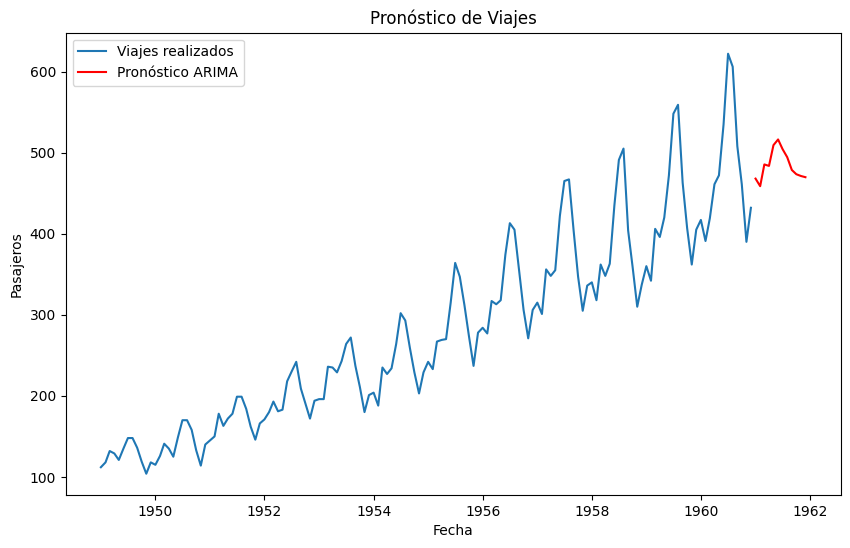

In [ ]:
model = ARIMA(series, order=(7, 1, 2))
model_fit = model.fit()


print(model_fit.summary())


residuals = model_fit.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuos", ax=axes[0])
residuals.plot(kind='kde', title='Densidad de Residuos', ax=axes[1])
plt.show()


forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(series, label='Viajes realizados')
plt.plot(forecast, label='Pronóstico ARIMA', color='red')
plt.title('Pronóstico de Viajes')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

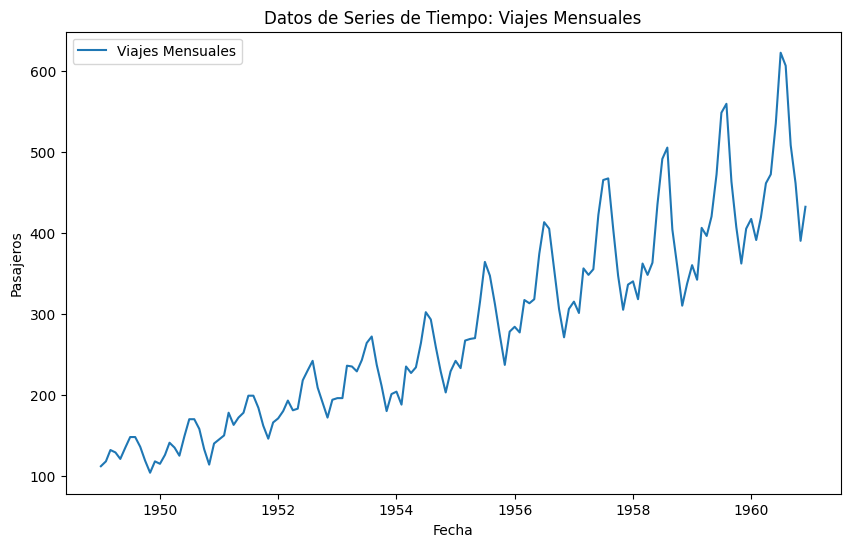

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/bkomwngo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/wx6zk1af.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24864', 'data', 'file=/tmp/tmpbkafy4av/bkomwngo.json', 'init=/tmp/tmpbkafy4av/wx6zk1af.json', 'output', 'file=/tmp/tmpbkafy4av/prophet_modelunh3ywjd/prophet_model-20240719005229.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:52:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:52:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


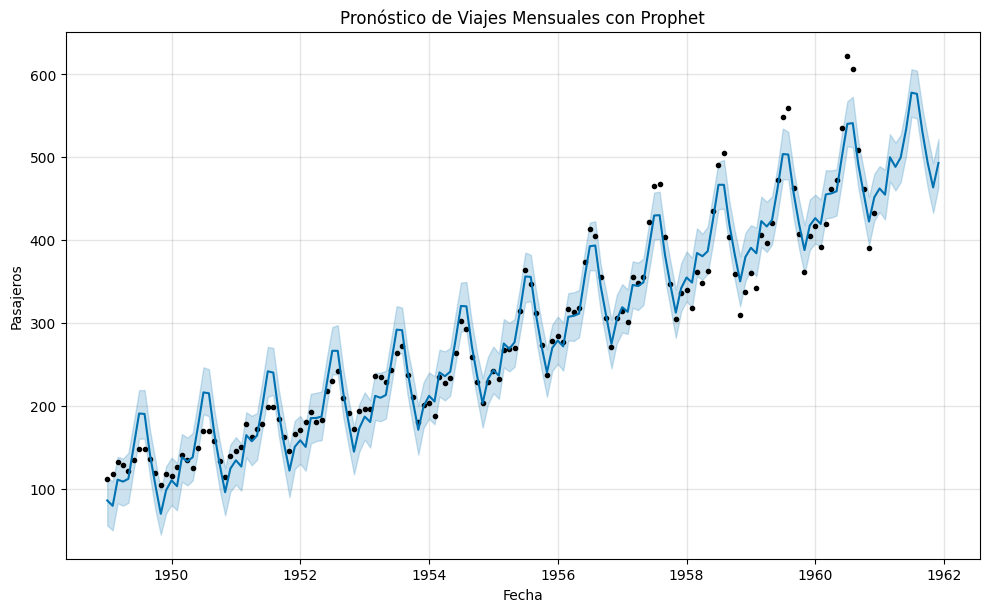

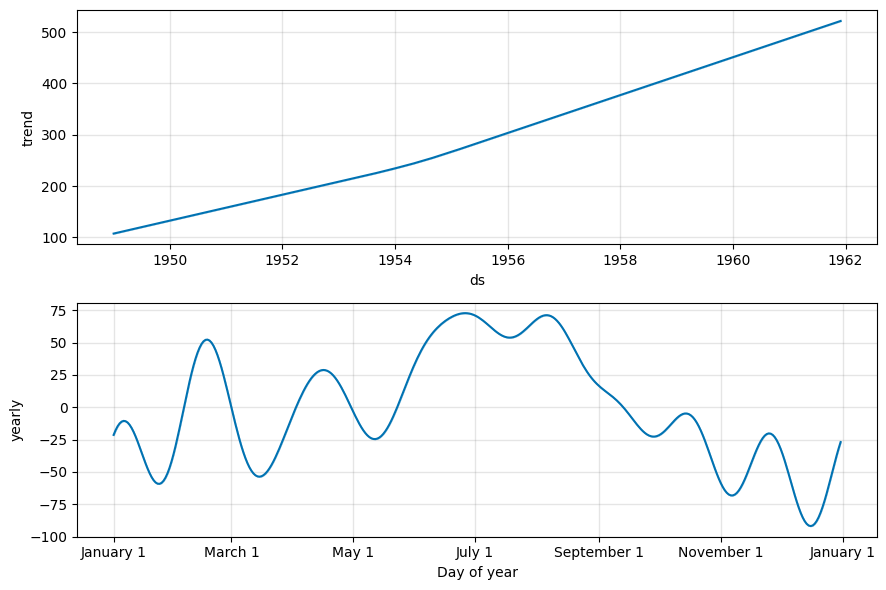

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')
data = data.reset_index()
data.columns = ['ds', 'y']

plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Viajes Mensuales')
plt.title('Datos de Series de Tiempo: Viajes Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

model = Prophet()
model.fit(data)


future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


fig = model.plot(forecast)
plt.title('Pronóstico de Viajes Mensuales con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.show()


fig2 = model.plot_components(forecast)
plt.show()


Epoch 1/20
113/113 - 5s - loss: 0.0382 - 5s/epoch - 42ms/step
Epoch 2/20
113/113 - 0s - loss: 0.0122 - 364ms/epoch - 3ms/step
Epoch 3/20
113/113 - 0s - loss: 0.0056 - 361ms/epoch - 3ms/step
Epoch 4/20
113/113 - 0s - loss: 0.0033 - 380ms/epoch - 3ms/step
Epoch 5/20
113/113 - 0s - loss: 0.0033 - 374ms/epoch - 3ms/step
Epoch 6/20
113/113 - 0s - loss: 0.0029 - 356ms/epoch - 3ms/step
Epoch 7/20
113/113 - 0s - loss: 0.0033 - 373ms/epoch - 3ms/step
Epoch 8/20
113/113 - 0s - loss: 0.0030 - 368ms/epoch - 3ms/step
Epoch 9/20
113/113 - 0s - loss: 0.0033 - 357ms/epoch - 3ms/step
Epoch 10/20
113/113 - 0s - loss: 0.0033 - 383ms/epoch - 3ms/step
Epoch 11/20
113/113 - 0s - loss: 0.0031 - 380ms/epoch - 3ms/step
Epoch 12/20
113/113 - 0s - loss: 0.0029 - 414ms/epoch - 4ms/step
Epoch 13/20
113/113 - 0s - loss: 0.0036 - 386ms/epoch - 3ms/step
Epoch 14/20
113/113 - 0s - loss: 0.0036 - 345ms/epoch - 3ms/step
Epoch 15/20
113/113 - 0s - loss: 0.0035 - 364ms/epoch - 3ms/step
Epoch 16/20
113/113 - 0s - loss: 0.0

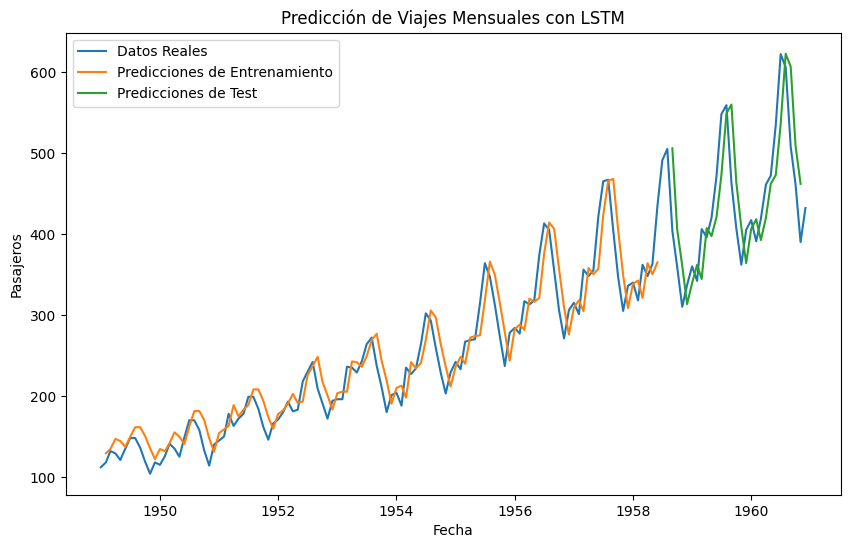

In [ ]:
data = pd.read_csv('/content/AirPassengers.csv', parse_dates=['Month'], index_col='Month')


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Datos Reales')
plt.plot(data.index[look_back:len(train_predict) + look_back], train_predict, label='Predicciones de Entrenamiento')
plt.plot(data.index[len(train_predict) + (look_back * 2) + 1:len(data) - 1], test_predict, label='Predicciones de Test')
plt.title('Predicción de Viajes Mensuales con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()


In [ ]:
# MODELO DE PREDICCION MENOS 12 MESES

In [ ]:
import pandas as pd
import numpy as np
!pip install prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler




In [ ]:
air_passenger_data = pd.read_csv(r'/content/AirPassengersmenos.csv')
air_passenger_data = air_passenger_data.rename(columns={'Month': 'ds', '#Passengers': 'y'})



In [ ]:
air_passenger_data['ds'] = pd.to_datetime(air_passenger_data['ds'])

In [ ]:
print(air_passenger_data.head())

          ds    y
0 1949-01-01  112
1 1949-02-01  118
2 1949-03-01  132
3 1949-04-01  129
4 1949-05-01  121


In [ ]:
model = Prophet()
model.fit(air_passenger_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/indt2vdq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/k2eab23o.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58642', 'data', 'file=/tmp/tmpbkafy4av/indt2vdq.json', 'init=/tmp/tmpbkafy4av/k2eab23o.json', 'output', 'file=/tmp/tmpbkafy4av/prophet_modelwt8xl_3d/prophet_model-20240719003213.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:32:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:32:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

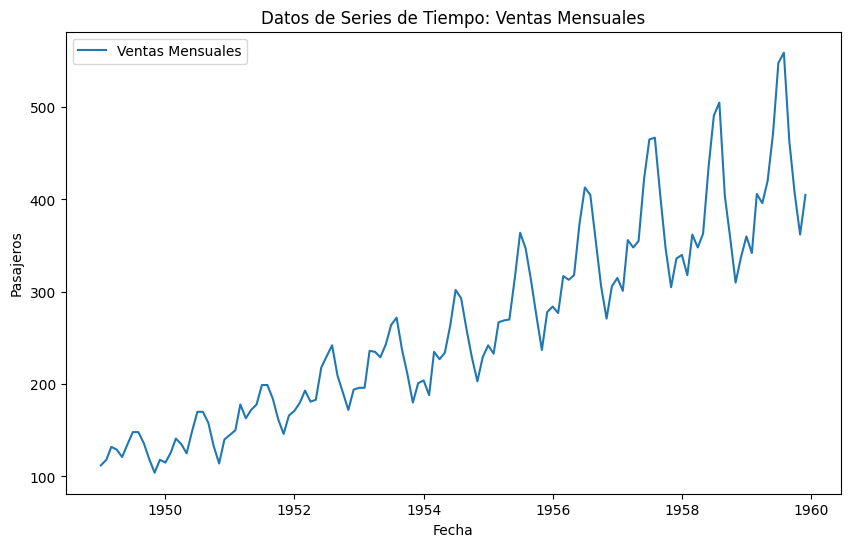

In [ ]:
data = pd.read_csv('/content/AirPassengersmenos.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

# Plotear los datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Ventas Mensuales')
plt.title('Datos de Series de Tiempo: Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

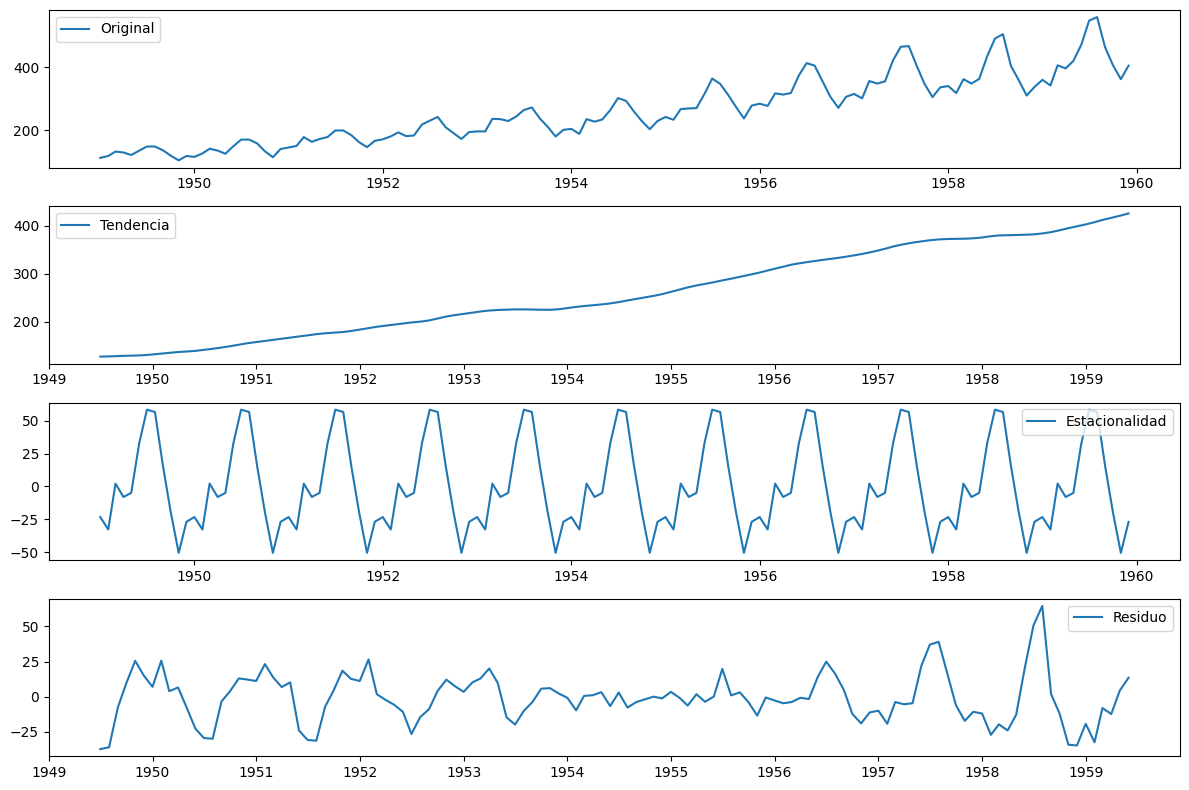

In [ ]:
data = pd.read_csv('/content/AirPassengersmenos.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

decomposition = seasonal_decompose(series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

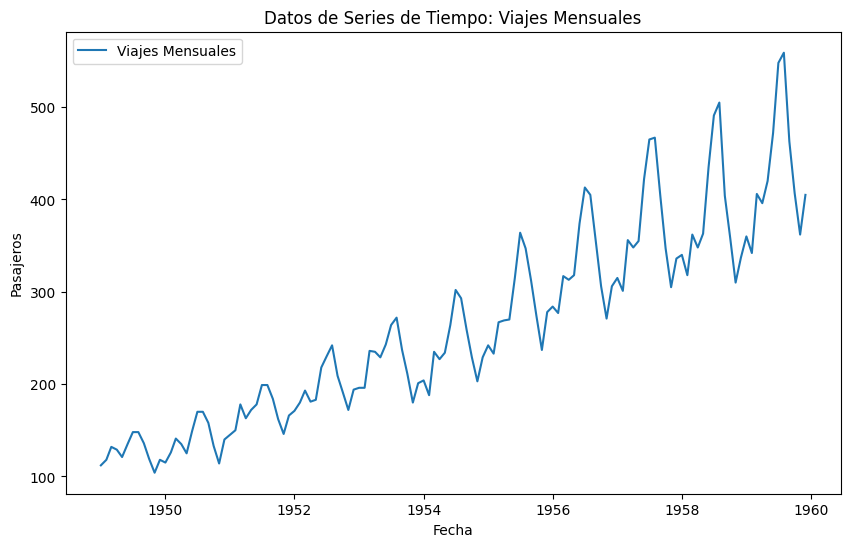

ADF Statistic: 0.8880265130074991
p-value: 0.9929320626482829


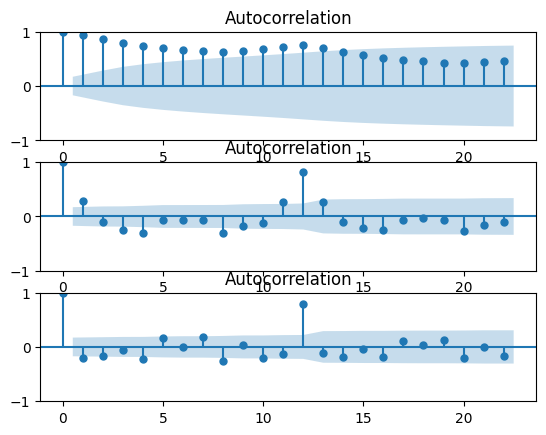

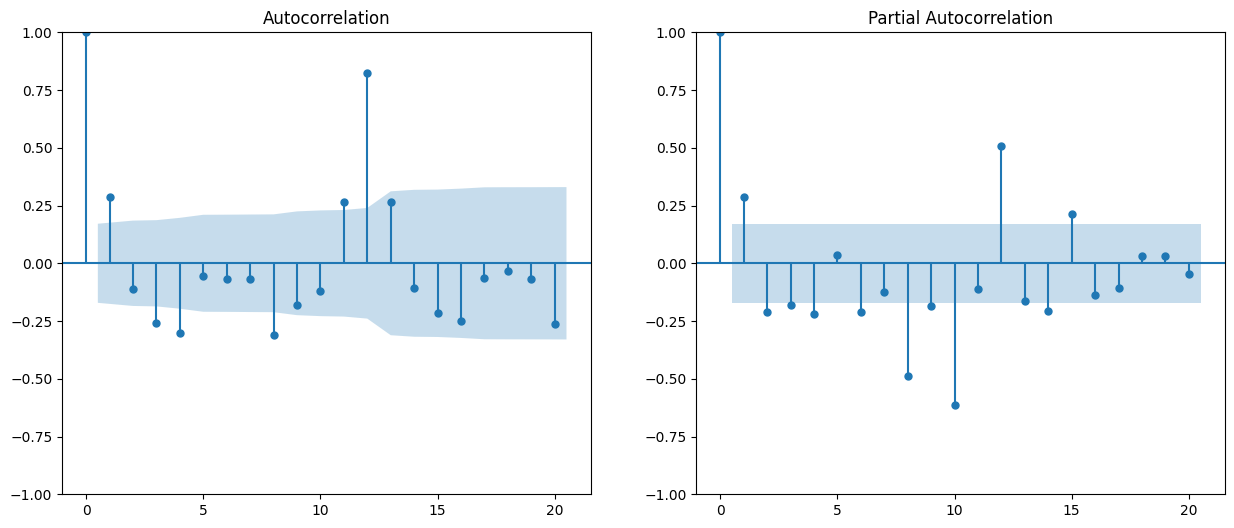

In [ ]:
data = pd.read_csv('/content/AirPassengersmenos.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

plt.figure(figsize=(10, 6))
plt.plot(series, label='Viajes Mensuales')
plt.title('Datos de Series de Tiempo: Viajes Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()


result = adfuller(series)
print('ADF Statistic:', result[0])
print('p-value:', result[1])


differenced_series = series.diff().dropna()

from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2, ax3) = plt.subplots(3)
plot_acf(series, ax=ax1)
plot_acf(series.diff().dropna(), ax=ax2)
plot_acf(series.diff().diff().dropna(), ax=ax3)


fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sm.graphics.tsa.plot_acf(differenced_series, lags=20, ax=axes[0])
sm.graphics.tsa.plot_pacf(differenced_series, lags=20, ax=axes[1])
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  132
Model:                 ARIMA(7, 1, 2)   Log Likelihood                -608.129
Date:                Fri, 19 Jul 2024   AIC                           1236.257
Time:                        00:54:56   BIC                           1265.009
Sample:                    01-01-1949   HQIC                          1247.940
                         - 12-01-1959                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1153      0.243      0.475      0.635      -0.361       0.591
ar.L2          0.3257      0.136      2.398      0.016       0.059       0.592
ar.L3         -0.3458      0.156     -2.215      0.0

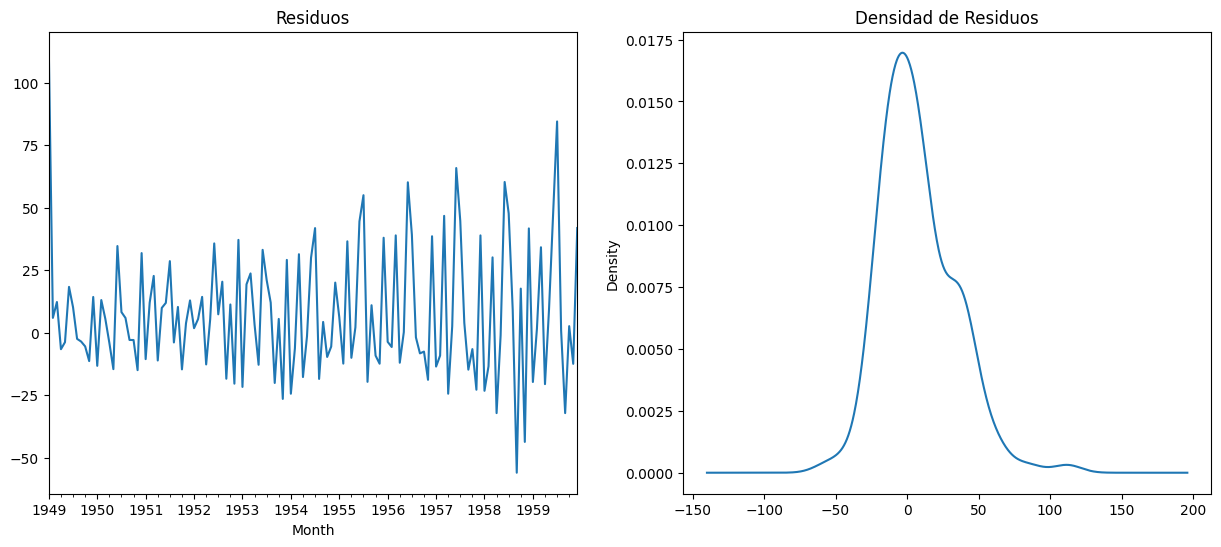

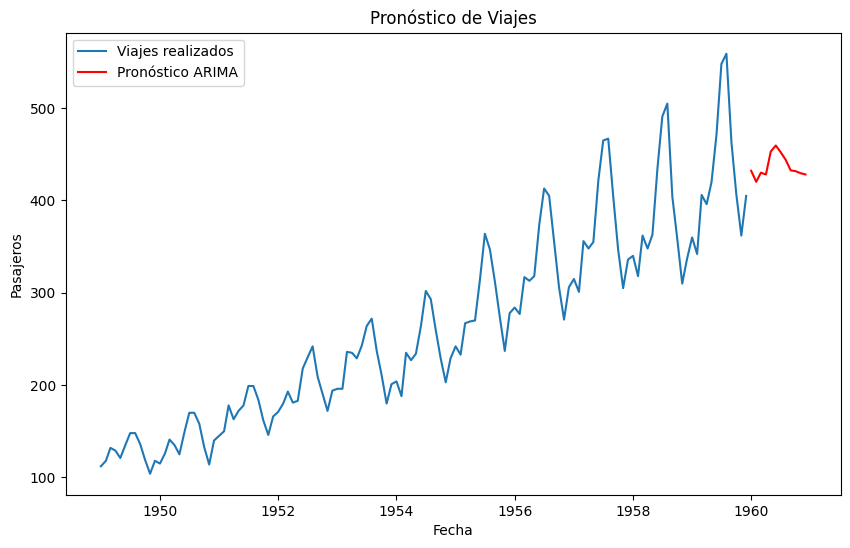

In [ ]:
model = ARIMA(series, order=(7, 1, 2))
model_fit = model.fit()


print(model_fit.summary())


residuals = model_fit.resid
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
residuals.plot(title="Residuos", ax=axes[0])
residuals.plot(kind='kde', title='Densidad de Residuos', ax=axes[1])
plt.show()


forecast = model_fit.forecast(steps=12)
plt.figure(figsize=(10, 6))
plt.plot(series, label='Viajes realizados')
plt.plot(forecast, label='Pronóstico ARIMA', color='red')
plt.title('Pronóstico de Viajes')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

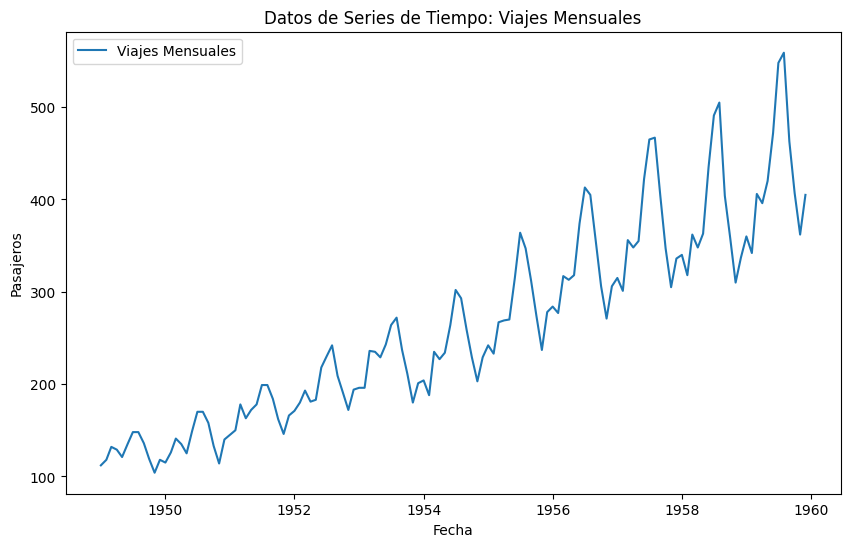

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/ejyz4y5p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/dsq9bk_1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52880', 'data', 'file=/tmp/tmpbkafy4av/ejyz4y5p.json', 'init=/tmp/tmpbkafy4av/dsq9bk_1.json', 'output', 'file=/tmp/tmpbkafy4av/prophet_modelwf3exs6_/prophet_model-20240719005530.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:55:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:55:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


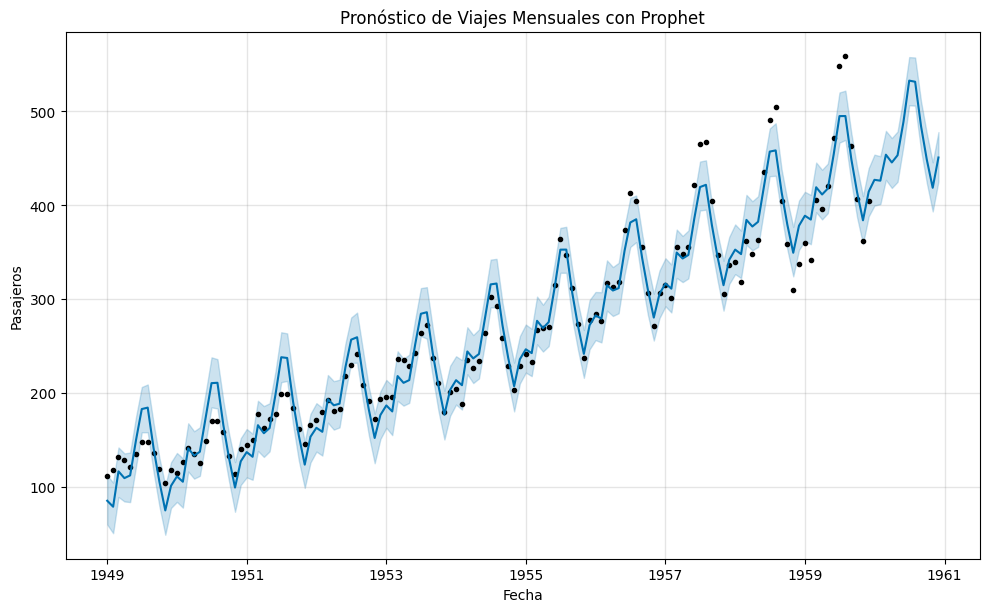

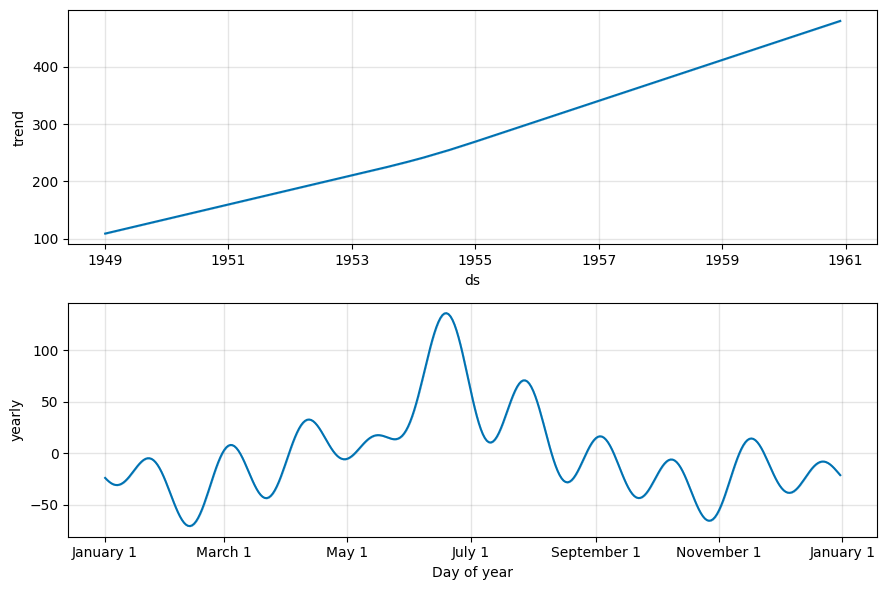

In [ ]:
data = pd.read_csv('/content/AirPassengersmenos.csv', parse_dates=['Month'], index_col='Month')
data = data.reset_index()
data.columns = ['ds', 'y']

plt.figure(figsize=(10, 6))
plt.plot(data['ds'], data['y'], label='Viajes Mensuales')
plt.title('Datos de Series de Tiempo: Viajes Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

model = Prophet()
model.fit(data)


future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)


fig = model.plot(forecast)
plt.title('Pronóstico de Viajes Mensuales con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.show()


fig2 = model.plot_components(forecast)
plt.show()

Epoch 1/20
103/103 - 7s - loss: 0.0406 - 7s/epoch - 69ms/step
Epoch 2/20
103/103 - 0s - loss: 0.0149 - 335ms/epoch - 3ms/step
Epoch 3/20
103/103 - 0s - loss: 0.0061 - 343ms/epoch - 3ms/step
Epoch 4/20
103/103 - 0s - loss: 0.0034 - 330ms/epoch - 3ms/step
Epoch 5/20
103/103 - 0s - loss: 0.0035 - 327ms/epoch - 3ms/step
Epoch 6/20
103/103 - 0s - loss: 0.0033 - 326ms/epoch - 3ms/step
Epoch 7/20
103/103 - 0s - loss: 0.0036 - 315ms/epoch - 3ms/step
Epoch 8/20
103/103 - 0s - loss: 0.0034 - 341ms/epoch - 3ms/step
Epoch 9/20
103/103 - 0s - loss: 0.0034 - 326ms/epoch - 3ms/step
Epoch 10/20
103/103 - 0s - loss: 0.0033 - 296ms/epoch - 3ms/step
Epoch 11/20
103/103 - 0s - loss: 0.0033 - 338ms/epoch - 3ms/step
Epoch 12/20
103/103 - 0s - loss: 0.0034 - 354ms/epoch - 3ms/step
Epoch 13/20
103/103 - 0s - loss: 0.0035 - 310ms/epoch - 3ms/step
Epoch 14/20
103/103 - 0s - loss: 0.0031 - 329ms/epoch - 3ms/step
Epoch 15/20
103/103 - 0s - loss: 0.0037 - 332ms/epoch - 3ms/step
Epoch 16/20
103/103 - 0s - loss: 0.0

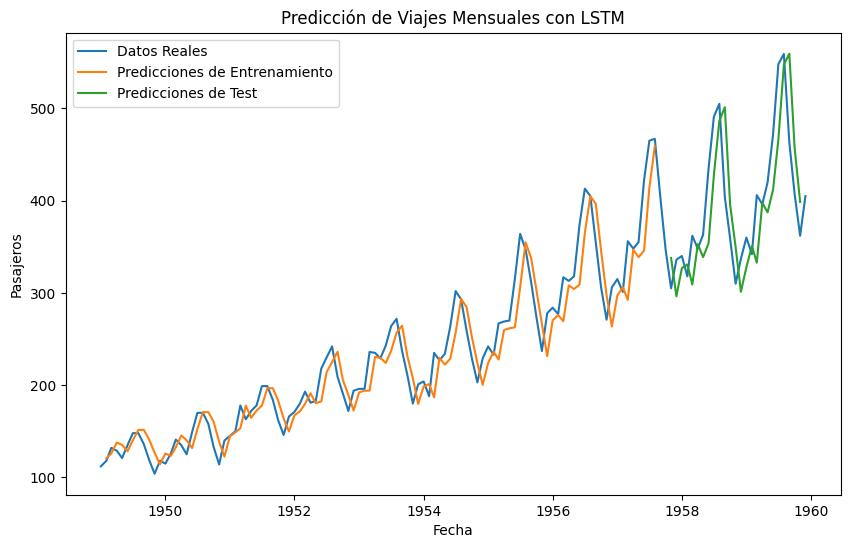

In [ ]:
data = pd.read_csv('/content/AirPassengersmenos.csv', parse_dates=['Month'], index_col='Month')


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data.values)

train_size = int(len(scaled_data) * 0.8)
train, test = scaled_data[:train_size], scaled_data[train_size:]

def create_dataset(dataset, look_back=1):
    X, y = [], []
    for i in range(len(dataset) - look_back - 1):
        X.append(dataset[i:(i + look_back), 0])
        y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)


X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')


model.fit(X_train, y_train, epochs=20, batch_size=1, verbose=2)


train_predict = model.predict(X_train)
test_predict = model.predict(X_test)


train_predict = scaler.inverse_transform(train_predict)
y_train = scaler.inverse_transform([y_train])
test_predict = scaler.inverse_transform(test_predict)
y_test = scaler.inverse_transform([y_test])


plt.figure(figsize=(10, 6))
plt.plot(data.index, data.values, label='Datos Reales')
plt.plot(data.index[look_back:len(train_predict) + look_back], train_predict, label='Predicciones de Entrenamiento')
plt.plot(data.index[len(train_predict) + (look_back * 2) + 1:len(data) - 1], test_predict, label='Predicciones de Test')
plt.title('Predicción de Viajes Mensuales con LSTM')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

In [ ]:
# ULTIMO AÑO

In [ ]:
import pandas as pd
import numpy as np
!pip install prophet
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from prophet import Prophet
!pip install statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

In [ ]:
air_passenger_data = pd.read_csv(r'/content/AirPassengers1año.csv')
air_passenger_data = air_passenger_data.rename(columns={'Month': 'ds', '#Passengers': 'y'})

In [ ]:
air_passenger_data['ds'] = pd.to_datetime(air_passenger_data['ds'])

In [ ]:
model = Prophet()
model.fit(air_passenger_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 8.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/rcn3woa5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpbkafy4av/_c82553n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97439', 'data', 'file=/tmp/tmpbkafy4av/rcn3woa5.json', 'init=/tmp/tmpbkafy4av/_c82553n.json', 'output', 'file=/tmp/tmpbkafy4av/prophet_modelz_lpirlr/prophet_model-20240719004624.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
00:46:24 - cmdstanpy - INFO - Chain [1] start processing
IN

In [ ]:
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

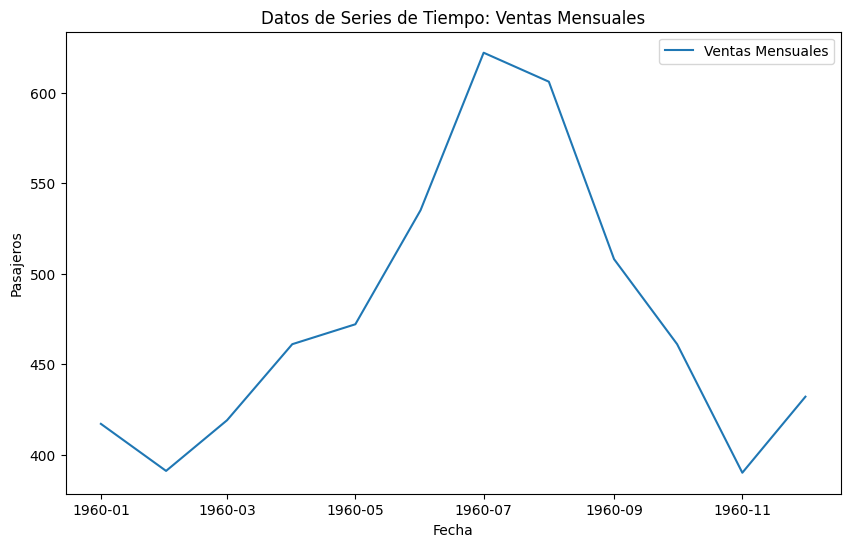

In [ ]:
data = pd.read_csv('/content/AirPassengers1año.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

# Plotear los datos
plt.figure(figsize=(10, 6))
plt.plot(series, label='Ventas Mensuales')
plt.title('Datos de Series de Tiempo: Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Pasajeros')
plt.legend()
plt.show()

In [ ]:
data = pd.read_csv('/content/AirPassengers1año.csv', parse_dates=['Month'], index_col='Month')
series = data['#Passengers']

decomposition = seasonal_decompose(series, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid


plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(series, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Tendencia')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Estacionalidad')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuo')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

ValueError: x must have 2 complete cycles requires 24 observations. x only has 12 observation(s)